## Pemodelan prediksi Cool and Warm by Season menggunakan GRU-RNN

Data yang digunakan merupakan indeks El Nino La Nina yang dapat diunduh melalui laman : https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

### Import Pustaka

Berikut adalah daftar pustaka yang digunakan dalam pemodelan GRU-RNN ini:

In [25]:
# Mengimport Pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import GRU, SimpleRNN, Dense, Dropout
import itertools
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [26]:
df=pd.read_excel('Data c&w.xlsx')

In [27]:
df.tail()

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
70,2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
71,2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0
72,2022,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8
73,2023,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.1,1.3,1.6,1.8,1.9,2.0
74,2024,1.8,1.5,1.1,0.7,0.4,0.2,0.0,-0.1,NaN,NaN,NaN,NaN


### Data Cleaning

In [28]:
df.dropna(inplace=True)

In [29]:
df.tail()

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
69,2019,0.7,0.7,0.7,0.7,0.5,0.5,0.3,0.1,0.2,0.3,0.5,0.5
70,2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
71,2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0
72,2022,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8
73,2023,-0.7,-0.4,-0.1,0.2,0.5,0.8,1.1,1.3,1.6,1.8,1.9,2.0


In [30]:
data = df.set_index('Year', inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 1950 to 2023
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DJF     74 non-null     float64
 1   JFM     74 non-null     float64
 2   FMA     74 non-null     float64
 3   MAM     74 non-null     float64
 4   AMJ     74 non-null     float64
 5   MJJ     74 non-null     float64
 6   JJA     74 non-null     float64
 7   JAS     74 non-null     float64
 8   ASO     74 non-null     float64
 9   SON     74 non-null     float64
 10  OND     74 non-null     float64
 11  NDJ     74 non-null     float64
dtypes: float64(12)
memory usage: 7.5 KB


### Normalisasi Data

In [32]:
years = np.arange(2000, 2030, 0.03)  # Generate years from 2000 to 2029
data = np.sin(np.linspace(0, 100, len(years))) + np.random.normal(0, 0.1, len(years))

In [33]:
data1 = np.array([df])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data1.reshape(-1, 1))

In [34]:
# Membuat Sequence Data
def create_sequences(data1, seq_length):
    X, y = [], []
    for i in range(len(data1) - seq_length):
        X.append(data1[i:(i + seq_length)])
        y.append(data1[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Panjang sequence
X, y = create_sequences(scaled_data, seq_length)

In [35]:
# Splitt data training dan testing, 90:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
# 70:30
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)

##### Pendefinisian Model GRU RNN

In [36]:
# initializing the RNN
model = Sequential()

# adding RNN layers and dropout regularization
model.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True))

model.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

model.add(SimpleRNN(units = 50,
                        activation='tanh'))

# adding the output layer
model.add(Dense(units = 1,
                        activation='relu'))


In [37]:
#initializing the GRU
model = Sequential()

# GRU layers with Dropout regularisation
model.add(GRU(units=50, 
                     return_sequences=True,
                     input_shape=(X_train.shape[1],1),
                     activation='tanh'))
model.add(Dropout(0.2))

model.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))

model.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))

model.add(GRU(units=50, 
                     activation='tanh'))

# The output layer
model.add(Dense(units=1,
                       activation='relu'))

In [38]:
# Compile model
model.compile(optimizer='adam', loss='mse')

In [39]:
# Training model 90:10
model.fit(X_train, y_train, 
          epochs=100, 
          batch_size=32, 
          validation_split=0.1,
          verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - loss: 0.0955 - val_loss: 0.0319
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0222 - val_loss: 0.0287
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0195 - val_loss: 0.0234
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0156 - val_loss: 0.0136
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0092 - val_loss: 0.0071
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0059 - val_loss: 0.0040
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0050 - val_loss: 0.0039
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0050 - val_loss: 0.0031
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0043 - val_loss: 0.0021
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/ste

In [40]:
# Training model 80:20
model.fit(X_train2, y_train2, 
          epochs=100, 
          batch_size=32, 
          validation_split=0.1,
          verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 8.9491e-04 - val_loss: 8.9955e-04
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.3249e-04 - val_loss: 6.8883e-04
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 9.4300e-04 - val_loss: 7.6438e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 9.2671e-04 - val_loss: 6.5700e-04
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.7112e-04 - val_loss: 6.9528e-04
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7.8035e-04 - val_loss: 8.5402e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.2504e-04 - val_loss: 6.6525e-04
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.4897e-04 - val_loss: 0.0014
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0011 - val_loss: 7.3375e-04
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.2155e-04 - val_loss: 0.0015
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0012 - v

In [41]:
# Training model 70:30
model.fit(X_train3, y_train3, 
          epochs=100, 
          batch_size=32, 
          validation_split=0.1,
          verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.2875e-04 - val_loss: 6.7971e-04
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 8.4119e-04 - val_loss: 6.6009e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8.0977e-04 - val_loss: 9.1448e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.5040e-04 - val_loss: 7.8885e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.5121e-04 - val_loss: 8.1155e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.4816e-04 - val_loss: 6.7242e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.2076e-04 - val_loss: 8.9715e-04
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.5131e-04 - val_loss: 6.8948e-04
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.7484e-04 - val_loss: 6.8669e-04
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.8710e-04 - val_loss: 0.0011
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 9.

##### Evaluasi Data Training dan Data Testing

In [42]:
# Evaluasi model 90:10
train_score1 = model.evaluate(X_train, y_train)
test_score1 = model.evaluate(X_test, y_test)
print(f'MSE Data Training: {train_score1}')
print(f'MSE Data Testing: {test_score1}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.4849e-04
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.7270e-04 
MSE Data Training: 0.000652469287160784
MSE Data Testing: 0.0006313860067166388


In [43]:
# Evaluasi model 80:20
train_score2 = model.evaluate(X_train2, y_train2)
test_score2 = model.evaluate(X_test2, y_test2)
print(f'MSE Data Training 2: {train_score2}')
print(f'MSE Data Testing 2: {test_score2}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.6088e-04
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 6.5107e-04
MSE Data Training 2: 0.0006548685487359762
MSE Data Testing 2: 0.0006323579582385719


In [44]:
# Evaluasi model 70:30
train_score3 = model.evaluate(X_train3, y_train3)
test_score3 = model.evaluate(X_test3, y_test3)
print(f'MSE Data Training 3: {train_score3}')
print(f'MSE Data Testing 3: {test_score3}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.1376e-04
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.6065e-04
MSE Data Training 3: 0.0006419472047127783
MSE Data Testing 3: 0.0006699131336063147


##### Prediksi model

In [45]:
# 90:10
predictions1 = model.predict(X_test)
# 80:20
predictions2 = model.predict(X_test2)
# 70:30
predictions3 = model.predict(X_test3)

3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 5s/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [46]:
# 90:10
predictions1 = scaler.inverse_transform(predictions1)
y_test_actual1 = scaler.inverse_transform(y_test)
# 80:20
predictions2 = scaler.inverse_transform(predictions2)
y_test_actual2 = scaler.inverse_transform(y_test2)
# 70:30
predictions3 = scaler.inverse_transform(predictions3)
y_test_actual3 = scaler.inverse_transform(y_test3)

##### Evaluasi model prediksi

In [47]:
r_squared1 = r2_score(y_test_actual1, predictions1)
r_squared2 = r2_score(y_test_actual2, predictions2)
r_squared3 = r2_score(y_test_actual3, predictions3)
print(f'R-squared model 1: {r_squared1}')
print(f'R-squared model 2: {r_squared2}')
print(f'R-squared model 3: {r_squared3}')

R-squared model 1: 0.9764570631609956
R-squared model 2: 0.9807271110361949
R-squared model 3: 0.9783132824005685


##### Visualisasi Model

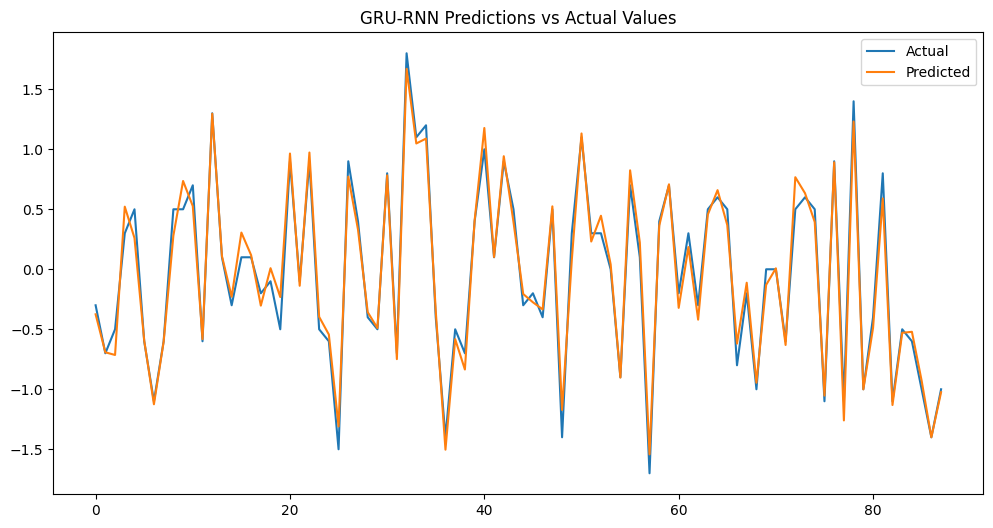

In [48]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual1, label='Actual')
plt.plot(predictions1, label='Predicted')
plt.legend()
plt.title('GRU-RNN Predictions vs Actual Values')
plt.show()

## Kesimpulan

- Pemodelan prediksi telah dilakukan menggunakn GRU RNN, pemodelan tersebut dilakukan dengan menggunakan beberapa perbandingan data training dan data testing yaitu 90:10, 80:20, 70:30. 
- Pemodelan prediksi menggunakan GRU RNN yang memiliki R2 Score paling baik adalah pada dataset dengan 80% data training dan 20% data testing yaitu sebesar 0.9792997670721768. R2 score mendekati nilai 1 menunjukkan bahwa model tersebut dapat digunakan untuk memprediksi data time series.
